In [ ]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
def play_beep():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
# play_beep()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 172 µs (started: 2021-08-12 07:28:05 +00:00)


# Import Libraries


In [ ]:
import IPython.display as display
import matplotlib.pyplot as plt
import random
import time

from tensorflow.keras import datasets, layers, models

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32 
IMG_SIZE = 192
SHUFFLE_SIZE = 1000

time: 4.76 ms (started: 2021-08-12 07:28:05 +00:00)


In [ ]:
import numpy as np

time: 1.1 ms (started: 2021-08-12 07:28:05 +00:00)


# Import Dataset

In [ ]:
# from google.colab import drive
# play_beep()
# drive.mount('/content/gdrive')


Mounted at /content/gdrive
time: 2min 47s (started: 2021-08-12 07:28:05 +00:00)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataset_path = './train/'
test_dataset_path = './test'

train_datagen = ImageDataGenerator(rescale=1./255) #changes pixels from range (0,255) to (0,1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(  #identifies classes automatically
        train_dataset_path,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,                       #batch size means number of training examples taken in one iteration
        class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode = 'binary')


Found 101 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
time: 1.64 s (started: 2021-08-12 07:30:53 +00:00)


# Write a model to classify the data

In [ ]:
model_self = models.Sequential() 
# increased the number of filters to increase accuracy
model_self.add(layers.Conv2D(32,(3, 3), activation = 'relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_self.add(layers.MaxPooling2D())
model_self.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_self.add(layers.MaxPooling2D())
model_self.add(layers.Conv2D(8, (3, 3), activation = 'relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_self.add(layers.MaxPooling2D())

# added a dense layer to learn the weights for the feature map outputs
model_self.add(layers.Dense(64, activation='relu'))

model_self.add(layers.Flatten()) #converts 2D data into 1D data
model_self.add(layers.Dense(3, activation='softmax'))

# compile the model
model_self.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

time: 6.01 s (started: 2021-08-12 07:30:54 +00:00)


In [ ]:
model_self.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 95, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 8)         0         
_________________________________________________________________
dense (Dense)                (None, 22, 22, 64)        5

## Train the Model


In [ ]:
history = model_self.fit(train_generator, validation_data=test_generator, epochs=5)

Epoch 1/5
4/4 [==============================] - 60s 6s/step - loss: 0.8927 - accuracy: 0.2970 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/5
4/4 [==============================] - 3s 617ms/step - loss: 0.6905 - accuracy: 0.5050 - val_loss: 0.6673 - val_accuracy: 0.6000
Epoch 3/5
4/4 [==============================] - 3s 674ms/step - loss: 0.6598 - accuracy: 0.5941 - val_loss: 0.6602 - val_accuracy: 0.6000
Epoch 4/5
4/4 [==============================] - 3s 858ms/step - loss: 0.6947 - accuracy: 0.5248 - val_loss: 0.7215 - val_accuracy: 0.5000
Epoch 5/5
4/4 [==============================] - 3s 638ms/step - loss: 0.6340 - accuracy: 0.5743 - val_loss: 0.6364 - val_accuracy: 0.6000
time: 1min 25s (started: 2021-08-12 07:31:00 +00:00)


#Show predictions on several images# 


In [ ]:
test_batch = test_generator.next()

time: 336 ms (started: 2021-08-12 07:32:26 +00:00)


In [ ]:
y_pred = model_self.predict(test_batch[0])
y_label = np.argmax(y_pred,1)

time: 147 ms (started: 2021-08-12 07:32:26 +00:00)


In [ ]:
class_names = dict()
for k,v in test_generator.class_indices.items():
  class_names[v] = k
class_names

{0: 'House_key', 1: 'TVS_key'}

time: 9.12 ms (started: 2021-08-12 07:32:27 +00:00)


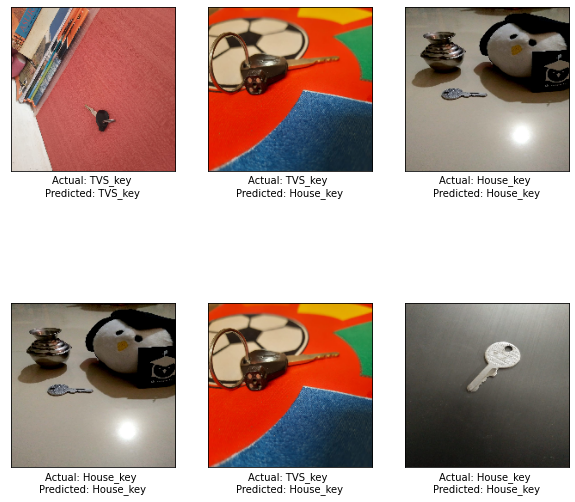

time: 424 ms (started: 2021-08-12 07:32:27 +00:00)


In [ ]:
fig, axs = plt.subplots(2,3, figsize=(10,10))
for y in axs:
  for x in y:
    i = random.randint(0, len(y_pred)-1)
    x.imshow(test_batch[0][i])
    x.set_xticks([])
    x.set_yticks([])
    x.set_xlabel(' '.join(['Actual:', class_names[test_batch[1][i]], '\nPredicted:', class_names[y_label[i]]]))
plt.show()

# Using data augmentation, see if this helps to improve accuracy

In [ ]:
train_augmented_datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.05,
      zoom_range=0.1,
      fill_mode='nearest',
      rescale=1./255)
train_augmented_generator = train_augmented_datagen.flow_from_directory(
        train_dataset_path,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode = 'binary')

Found 101 images belonging to 2 classes.
time: 141 ms (started: 2021-08-12 07:32:27 +00:00)


In [ ]:
model_augmented = models.Sequential()
# increased the number of filters learnt to increase accuracy
model_augmented.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_augmented.add(layers.MaxPooling2D())
model_augmented.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_augmented.add(layers.MaxPooling2D())
model_augmented.add(layers.Conv2D(8, (3, 3), activation = 'relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_augmented.add(layers.MaxPooling2D())

# added a dense layer to learn the weights for the feature map outputs
model_augmented.add(layers.Dense(64, activation='relu'))

model_augmented.add(layers.Flatten())
model_augmented.add(layers.Dense(3, activation='softmax'))

# compile the model
model_augmented.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

time: 85.7 ms (started: 2021-08-12 07:32:27 +00:00)


In [ ]:
# train the modelgmented.fit(train_augm
history = model_auented_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
4/4 [==============================] - 4s 914ms/step - loss: 0.8620 - accuracy: 0.4851 - val_loss: 0.7379 - val_accuracy: 0.4000
Epoch 2/10
4/4 [==============================] - 3s 1s/step - loss: 0.6985 - accuracy: 0.5446 - val_loss: 0.7292 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 3s 1s/step - loss: 0.6888 - accuracy: 0.6040 - val_loss: 0.8283 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 3s 986ms/step - loss: 0.7533 - accuracy: 0.5248 - val_loss: 0.7988 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 3s 768ms/step - loss: 0.6815 - accuracy: 0.5842 - val_loss: 0.7761 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 3s 724ms/step - loss: 0.7329 - accuracy: 0.4950 - val_loss: 0.6579 - val_accuracy: 0.6000
Epoch 7/10
4/4 [==============================] - 3s 753ms/step - loss: 0.7080 - accuracy: 0.5941 - val_loss: 0.7256 - val_accuracy: 0.5000
Epoch 8/10
4/4 [==========

In [ ]:
test_batch = test_generator.next()

time: 297 ms (started: 2021-08-12 07:33:01 +00:00)


In [ ]:
y_pred = model_augmented.predict(test_batch[0])
y_label = np.argmax(y_pred,1)

time: 105 ms (started: 2021-08-12 07:33:01 +00:00)


#Displaying the results after Augmentation


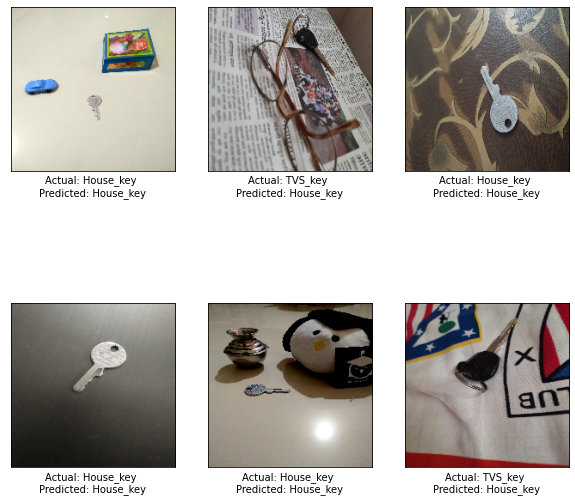

time: 385 ms (started: 2021-08-12 07:33:01 +00:00)


In [ ]:
fig, axs = plt.subplots(2,3, figsize=(10,10))
for y in axs:
  for x in y:
    i = random.randint(0, len(y_pred)-1)
    x.imshow(test_batch[0][i])
    x.set_xticks([])
    x.set_yticks([])
    x.set_xlabel(' '.join(['Actual:', class_names[test_batch[1][i]], '\nPredicted:', class_names[y_label[i]]]))
plt.show()

# Produce plots of accuracy / loss as a function of epochs


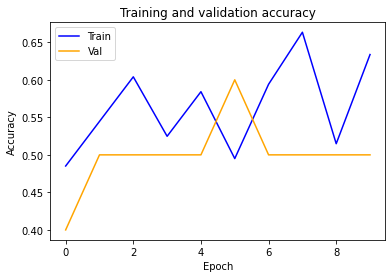

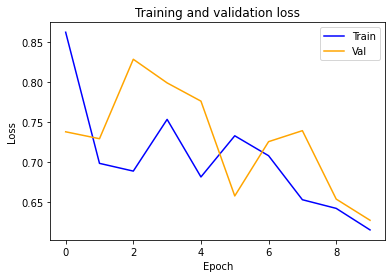

time: 461 ms (started: 2021-08-12 07:33:02 +00:00)


In [ ]:
# A plotting function we can use
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy') #displays accuracy of training and testing ina  graph
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')     #
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


plot(history)